# Practical Machine Learning with Scikit-Learn
* [Regressioin](#Regression)
* [Classification](#Classification)
* [Boosting and Optimization](#Boosting-and-Optimization)

## Regression
* Data:
  * [Fathers and Son height Data from Pearson's Data](https://www.kaggle.com/abhilash04/fathersandsonheight?select=Pearson.txt)
  * [Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict.csv)
  
## The smaller dataset, the easier to get overfitting

### 1. Father & son height
* Models:
  * Linear regression
  * Polynominal

#### 1a. Load data
* 因為輸入檔案是 txt 檔，所以要用 `sep="\t"` 指明是用 tab 當分隔符號

In [1]:
import pandas as pd
from IPython.display import display

# dataset = pd.read_csv("fathersonheight.csv")
dataset = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/Pearson.txt", sep="\t")
display(dataset.head())
print(dataset.info())

x = dataset["Father"].values.reshape(-1, 1)
y = dataset["Son"].values
print(dataset["Father"].values.shape) # 如果不 reshape 的話，dataset["Father"].values 的格式不是我們要用來訓練的格式
print(type(x), x, x.shape)
print(type(y), y, y.shape)

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
None
(1078,)
<class 'numpy.ndarray'> [[65. ]
 [63.3]
 [65. ]
 ...
 [71.8]
 [70.7]
 [70.3]] (1078, 1)
<class 'numpy.ndarray'> [59.8 63.2 63.3 ... 69.3 69.3 67. ] (1078,)


#### 1b. Linear regression model

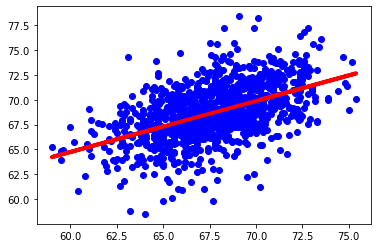

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue")
plt.plot(x, lin_reg.predict(x), color="red", linewidth=4)
plt.show()

#### 1c. Polynominal model

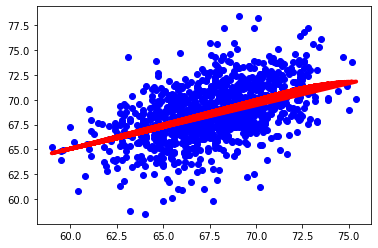

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4) # use degree=4 for quadratic
x_poly = poly.fit_transform(x) # convert the x values to polynomial
poly.fit(x_poly, y)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y)

import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue")
plt.plot(x, lin_reg_poly.predict(poly.fit_transform(x)), color="red", linewidth=4)
plt.show()

### 2. Admission prediction

#### 2a. Load data
* 因為輸入資料包含了 index 所以要在讀取時指明是要把哪個欄位當作 index

In [4]:
import pandas as pd

# dataset = pd.read_csv("admissiondata.csv")
dataset = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/Admission_Predict.csv", index_col=0)
display(dataset.head())
print(dataset.info())

x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 7].values
print(type(x), x, x.shape)
print(type(y), y, y.shape)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB
None
<class 'numpy.ndarray'> [[337.   118.     4.     4.5    4.5    9.65]
 [324.   107.     4.     4.     4.5    8.87]
 [316.   104.     3.     3.     3.5    8.  ]
 ...
 [330.   116.     4.     5.     4.5    9.45]
 [312.   103.     3.     3.5    4.     8.78]
 [333.   117.     4.     5.     4.     9.66]] (400, 6)
<class 'numpy.ndarray'> [0.92 0.76 0.72 0.8  0.65 0

#### 2b. Data engeering
* 把 80% 的資料當作 training set 剩下的 20% 的資料當作 testing set

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(type(x_train), x_train, x_train.shape)
print(type(y_train), y_train, y_train.shape)

print(type(x_test), x_test, x_test.shape)
print(type(y_test), y_test, y_test.shape)

<class 'numpy.ndarray'> [[315.   110.     2.     3.5    3.     8.46]
 [315.    99.     2.     3.5    3.     7.89]
 [332.   119.     4.     5.     4.5    9.24]
 ...
 [328.   110.     4.     5.     4.     9.14]
 [339.   119.     5.     4.5    4.     9.7 ]
 [336.   119.     5.     4.     3.5    9.8 ]] (320, 6)
<class 'numpy.ndarray'> [0.72 0.63 0.9  0.61 0.79 0.48 0.94 0.72 0.69 0.75 0.75 0.69 0.78 0.7
 0.75 0.73 0.68 0.69 0.93 0.68 0.93 0.91 0.49 0.67 0.96 0.59 0.76 0.63
 0.93 0.74 0.57 0.7  0.82 0.89 0.64 0.84 0.88 0.34 0.76 0.81 0.91 0.47
 0.84 0.82 0.56 0.85 0.66 0.85 0.93 0.64 0.82 0.89 0.57 0.79 0.71 0.73
 0.67 0.5  0.44 0.73 0.71 0.59 0.95 0.92 0.94 0.79 0.69 0.52 0.72 0.67
 0.89 0.73 0.57 0.59 0.72 0.89 0.85 0.83 0.81 0.86 0.71 0.64 0.78 0.75
 0.78 0.75 0.94 0.84 0.64 0.38 0.81 0.61 0.7  0.95 0.74 0.8  0.39 0.68
 0.56 0.75 0.9  0.85 0.71 0.92 0.63 0.58 0.84 0.94 0.69 0.69 0.71 0.71
 0.81 0.83 0.89 0.72 0.82 0.7  0.64 0.8  0.96 0.57 0.8  0.36 0.76 0.88
 0.61 0.74 0.47 0.84 0.88 0.8

#### 2c. Polynomial model

In [6]:
from sklearn.preprocessing import PolynomialFeatures

multi_poly = PolynomialFeatures(degree=2) # 這裡只用 2 次多項式
x_poly = multi_poly.fit_transform(x_train)
multi_poly.fit(x_poly, y_train)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(x_poly, y_train)

y_preds = lin_reg_multi.predict(multi_poly.fit_transform(x_test))

from sklearn import metrics
# To know how good is our model
# 因為這裏是用 linear regression 模型，可以用 MSE 來判斷模型預測的結果的好壞
print(metrics.mean_squared_error(y_test, y_preds))

0.004442341379769534


## Classification
* Data:
  * [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv)

#### 1a. Load data

In [7]:
import pandas as pd

# dataset = pd.read_csv("cancer.csv")
dataset = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/breast_cancer.csv")
display(dataset.head())
print(dataset.info())
print(len(dataset.columns))

x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values
print(type(x), x, x.shape)
print(type(y), y, y.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1b. Data engineering
* 把 80% 的資料當作 training set 剩下的 20% 的資料當作 testing set
* 把數值資料做 standardlization $x_{new} = \frac{x_{old} - \mu}{\sigma}$
  * 這是一種 scaling

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train)
print(x_test)

[[ 1.42387695  1.62361053  1.44101039 ...  0.82838394  2.5909234
   1.61650397]
 [-0.88701893 -1.02116553 -0.8861077  ... -0.95276866 -0.3522672
  -0.55988481]
 [ 0.36530132  0.38831218  0.42444649 ...  0.86280235  0.93793354
   0.7148709 ]
 ...
 [-0.37036663  2.18510979 -0.40506966 ... -0.38486493 -0.58348139
  -0.13496624]
 [ 0.23613824 -0.60634364  0.25488363 ... -0.78067662 -0.22835683
  -0.41456841]
 [ 1.39579802  1.24087431  1.6239919  ... -1.20230212  0.87470093
   0.44054424]]
[[-0.02126401 -1.40913872 -0.08493182 ... -0.87952794 -0.94398627
  -1.13110986]
 [-0.04522049 -0.70911992 -0.09455065 ... -1.1927092  -0.30258005
  -0.66378055]
 [-0.28478532 -0.80162241 -0.2589452  ... -1.73427188 -0.16415155
   0.29605083]
 ...
 [-0.13206274 -0.48911401 -0.19773446 ... -0.67234649 -0.56565682
  -0.65513342]
 [-0.88070283 -1.4866408  -0.93182611 ... -0.87470977 -1.09594443
  -1.22132825]
 [-0.86273546 -0.32160951 -0.84001    ...  0.36356076 -0.04326151
  -0.29051279]]


#### 1c. Logistic regression model
* Logistic regression 是一種 classification
* Classification model 可以用 confusion matrix 來判斷模型預測的結果的好壞

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train, y_train)

y_preds = logistic_classifier.predict(x_test)

# metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  2]
 [ 3 37]]


#### 1d. SVM model
* SVM 通常比 logistic regression 的結果好
* SVM 分兩種:
  * SVC: support vector classification
  * SVR: support vector regression

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf")
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  2]
 [ 3 37]]


#### 1e. Decision tree model
* Scalling doesn't help decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  2]
 [ 3 37]]


#### 1f. Random forest
* Ensemble
* RF 容易 overfitting

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, criterion="entropy")
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[72  2]
 [ 3 37]]


## Boosting and Optimization
* Data:
  * [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv)

#### 1a. Load data

In [13]:
import pandas as pd
# dataset = pd.read_csv("cancer.csv")
dataset = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/breast_cancer.csv")

x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values

#### 1b. Data engeering

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train)

[[ 0.93672053  1.56724834  0.92966695 ... -0.37775362 -0.48470187
   0.03825434]
 [-0.93462051 -1.68820921 -0.96290255 ... -1.76458665 -1.13990074
  -1.15570821]
 [-1.23185041  0.04918487 -1.17944654 ...  1.0277603  -0.16477072
  -0.03724079]
 ...
 [-0.78801776  0.29069496 -0.61075778 ...  3.42514005  3.83342577
   1.9688404 ]
 [ 0.56015267 -0.28350762  0.5374678  ... -0.06195777 -0.20625492
   0.03777953]
 [-0.92312226  0.52974067 -0.8477462  ...  2.5845004   0.08413445
   0.61752512]]


#### 1c. Principle component analysis (PCA) model

[[ 3.94952028]
 [-4.41652412]
 [-2.29148832]
 [ 3.46488443]
 [-3.45860166]
 [-3.65187567]
 [ 4.56171306]
 [ 3.7928182 ]
 [-3.08510009]
 [ 4.3709421 ]]


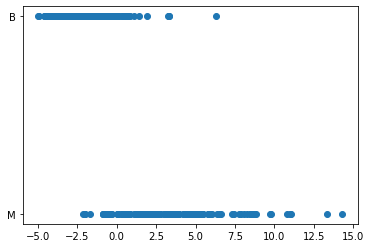

In [15]:
# PCA can help to extract important features

from sklearn.decomposition import PCA
pca = PCA(n_components=1) # turn all x_{i} values into one component
x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])

import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

#### 1d. Gradient boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)


y_preds = gradientboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[76  1]
 [ 0 37]]


#### 1e. Extreme gradient boost (XGBoost) model
* Scalling doesn't help decision tree

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

y_preds = xgboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))